In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
data = pd.read_csv('Terrorism_final.csv')
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
209701,202012310015,2020,12,31,31-12-2020,0,NaN,228,Yemen,10,...,NaN,"""Al Houthi militia escalated in Hays and targe...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
209702,202012310016,2020,12,31,31-12-2020,0,NaN,228,Yemen,10,...,NaN,"""Al Houthi militia escalated in Hays and targe...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
209703,202012310017,2020,12,31,NaN,0,NaN,75,Germany,8,...,NaN,"""Far-left arson attack suspected on German asy...","""Fire of Bundeswehr vehicles in Leipzig, proba...","""Anarchist Antifa Take Credit for Arson Attack...",START Primary Collection,-9,-9,0,-9,NaN
209704,202012310018,2020,12,31,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""Civil society activist and tribal elder kille...","""Terrorism Digest: 1-2 Jan 21,"" BBC Monitoring...",NaN,START Primary Collection,-9,-9,0,-9,NaN
209705,202012310019,2020,12,31,NaN,1,NaN,33,Burkina Faso,11,...,NaN,"""Terrorism Digest: 3-4 Jan 21,"" BBC Monitoring...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


**PRE-PROCESSING**

In [26]:
data.isnull().sum()

,0
eventid,0
iyear,0
imonth,0
iday,0
approxdate,197017
...,...
INT_LOG,0
INT_IDEO,0
INT_MISC,0
INT_ANY,0


In [27]:
data['eventid'].nunique()

209706

In [28]:
i = 1
for i in data.columns:
  print(i,data[i].nunique())


eventid 209706
iyear 50
imonth 13
iday 32
approxdate 3305
extended 2
resolution 3557
country 204
country_txt 204
region 12
region_txt 12
provstate 2623
city 45147
latitude 64455
longitude 64273
specificity 5
vicinity 3
location 51346
summary 140085
crit1 2
crit2 2
crit3 2
doubtterr 3
alternative 5
alternative_txt 5
multiple 2
success 2
suicide 2
attacktype1 9
attacktype1_txt 9
attacktype2 9
attacktype2_txt 9
attacktype3 7
attacktype3_txt 7
targtype1 22
targtype1_txt 22
targsubtype1 112
targsubtype1_txt 112
corp1 38367
target1 93526
natlty1 215
natlty1_txt 215
targtype2 22
targtype2_txt 22
targsubtype2 108
targsubtype2_txt 108
corp2 3124
target2 5752
natlty2 161
natlty2_txt 161
targtype3 20
targtype3_txt 20
targsubtype3 93
targsubtype3_txt 93
corp3 507
target3 850
natlty3 116
natlty3_txt 116
gname 3725
gsubname 1369
gname2 490
gsubname2 71
gname3 137
gsubname3 16
motive 17805
guncertain1 2
guncertain2 2
guncertain3 2
individual 2
nperps 117
nperpcap 52
claimed 3
claimmode 11
claimmode_t

In [29]:
low_cardinality = [i for i in data.columns if data[i].nunique() < 70]
low_cardinality

['iyear',
 'imonth',
 'iday',
 'extended',
 'region',
 'region_txt',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targtype2',
 'targtype2_txt',
 'targtype3',
 'targtype3_txt',
 'gsubname3',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperpcap',
 'claimed',
 'claimmode',
 'claimmode_txt',
 'claim2',
 'claimmode2',
 'claimmode2_txt',
 'claim3',
 'claimmode3',
 'claimmode3_txt',
 'compclaim',
 'weaptype1',
 'weaptype1_txt',
 'weapsubtype1',
 'weapsubtype1_txt',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype3',
 'weaptype3_txt',
 'weapsubtype3',
 'weapsubtype3_txt',
 'weaptype4',
 'weaptype4_txt',
 'weapsubtype4',
 'weapsubtype4_txt',
 'nkillus',
 'nwoundus',
 'nwoundte',
 'property',
 'propextent

In [30]:
cat_col = data.select_dtypes(include=['object'])
cat_col.head()

,approxdate,resolution,country_txt,region_txt,provstate,city,location,summary,alternative_txt,attacktype1_txt,...,divert,kidhijcountry,ransomnote,hostkidoutcome_txt,addnotes,scite1,scite2,scite3,dbsource,related
0,NaN,NaN,Dominican Republic,Central America & Caribbean,National,Santo Domingo,NaN,NaN,NaN,Assassination,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,NaN
1,NaN,NaN,Mexico,North America,Federal,Mexico city,NaN,NaN,NaN,Hostage Taking (Kidnapping),...,NaN,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,NaN
2,NaN,NaN,Philippines,Southeast Asia,Tarlac,Unknown,NaN,NaN,NaN,Assassination,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,NaN
3,NaN,NaN,Greece,Western Europe,Attica,Athens,NaN,NaN,NaN,Bombing/Explosion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,NaN
4,NaN,NaN,Japan,East Asia,Fukouka,Fukouka,NaN,NaN,NaN,Facility/Infrastructure Attack,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,NaN


ID IMPOSES HIGH CARDINALITY, SO WE CAN DROP THE EVENTID COL


ALSO WE CAN DROP RESOLUTION AS IT SHOWS IF THERE WAS AN EXTENDED HOSTAGE SITUATION THEY HOW MANY DAYS

THE REGION AND COUNTRY CAN BE DROPPED TOO AS IT SHOWS THE CATEGORICAL VALUE INTO NUMERIC

APPROXDATE CAN BE DROPPPED AS WE HAVE YEAR MONTH DAY



In [31]:
pd.crosstab(data['targtype1'],data['targtype1_txt'])

targtype1_txt,Abortion Related,Airports & Aircraft,Business,Educational Institution,Food or Water Supply,Government (Diplomatic),Government (General),Journalists & Media,Maritime,Military,...,Police,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists/Non-State Militia,Tourists,Transportation,Unknown,Utilities,Violent Political Party
targtype1,,,,,,,,,,,,,,,,,,,,,
1,0,0,22169,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,23828,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,28568,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,34131,...,0,0,0,0,0,0,0,0,0,0
5,267,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1428,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,3802,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,4761,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,352,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
cols_to_keep = [
    'iyear',
    'imonth',
    'iday',
    'extended',
    'country_txt',
    'region_txt',
    'provstate',
    'city',
    'latitude',
    'crit1',
    'crit2',
    'crit3',
    'longitude',
    'attacktype1_txt',
    'targtype1_txt',
    'weaptype1_txt',
    'nkill',
    'nwound',
    'gname',
    'success',
    'doubtterr'
]

In [33]:
pd.crosstab(data['attacktype1_txt'],data['region_txt'])

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
attacktype1_txt,,,,,,,,,,,,
Armed Assault,56,4369,122,138,1309,10567,552,4057,13369,4719,8374,1921
Assassination,36,1268,116,57,418,4713,310,2835,5031,1777,2022,2956
Bombing/Explosion,74,3246,237,338,2826,35011,1576,9348,24837,5404,6606,8655
Facility/Infrastructure Attack,111,409,24,209,303,1369,1043,938,2635,1066,1315,2903
Hijacking,3,26,8,18,27,149,20,85,113,65,169,76
Hostage Taking (Barricade Incident),6,187,4,3,21,127,72,242,165,83,148,98
Hostage Taking (Kidnapping),13,507,46,15,226,3399,131,1513,4052,864,3005,274
Unarmed Assault,10,19,6,47,79,224,110,50,381,29,100,174
Unknown,16,355,17,22,117,2693,33,778,4142,491,2007,271


In [34]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [35]:
data = data.drop(columns = [c for c in data.columns if c not in cols_to_keep])
data.head()

,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,longitude,...,crit2,crit3,doubtterr,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,...,1,1,0,1,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,...,1,1,0,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,...,1,1,0,1,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,1,0,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,...,1,1,0,1,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,...,1,1,-9,1,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [37]:
data.shape

(209706, 21)

In [38]:
data.isnull().sum()

,0
iyear,0
imonth,0
iday,0
extended,0
country_txt,0
region_txt,0
provstate,0
city,427
latitude,4691
longitude,4692


In [39]:
data['city'] = data['city'].fillna('Unknown')

In [40]:
data['nkill'].nunique()

210

In [41]:
kills_by_year = data.groupby('iyear')['nkill'].sum()
kills_by_year

,nkill
iyear,
1970,174.0
1971,173.0
1972,485.0
1973,370.0
1974,539.0
1975,617.0
1976,674.0
1977,457.0
1978,1459.0


In [42]:
data['weaptype1_txt'].dropna()

,weaptype1_txt
0,Unknown
1,Unknown
2,Unknown
3,Explosives
4,Incendiary
...,...
209701,Explosives
209702,Explosives
209703,Incendiary
209704,Firearms


FOR THE weaptype1_txt we dropped the values for filling up the city we filled with unknown

But for the latitude,longitude and nkill,nwound we cant just fill or drop beacue there are a lot of numbers so we will kee them as it is for now!

**FEATURE** **ENGINEERING**

In [45]:
data['imonth'] = data['imonth'].replace(0, 1)
data['iday'] = data['iday'].replace(0, 1)
data['date'] = pd.to_datetime(
    dict(year=data['iyear'], month=data['imonth'], day=data['iday']),
    errors='coerce'
)
data['decade'] = (data['iyear'] // 10) * 10

data.head()


,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,longitude,...,doubtterr,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound,date,decade
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,...,0,1,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0,1970-07-02,1970
1,1970,1,1,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,...,0,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,1970-01-01,1970
2,1970,1,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,...,0,1,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,1970-01-01,1970
3,1970,1,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,...,0,1,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN,1970-01-01,1970
4,1970,1,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,...,-9,1,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN,1970-01-01,1970


In [46]:
data["severity_score"] = (
    data["nkill"].fillna(0) * 2 +
    data["nwound"].fillna(0)
)

In [48]:
data['total_casualties'] = data[['nkill','nwound']].sum(axis = 1,min_count = 1)


In [49]:
data['crit_sum'] = data[['crit1','crit2','crit3']].sum(axis = 1)

TO BE SPECIFIC THERE IS A CLEAR TERRORISM

In [50]:
strict_mask = data['doubtterr'] == 0 & (data['crit_sum'] >= 2)
data_strict = data[strict_mask].copy()

In [51]:
def intensity(x):
  if pd.isna(x):
    return 'Unknown'
  if x == 0:
    return 'None'
  if x < 5:
    return 'Low'
  if x < 20:
    return 'Medium'
  return 'High'

In [52]:
data['intensity_level'] = data['nkill'].apply(intensity)

In [54]:
group_activity = data['gname'].value_counts()
group_activity

,count
gname,
Unknown,91906
Taliban,11982
Islamic State of Iraq and the Levant (ISIL),7254
Shining Path (SL),4564
Al-Shabaab,4419
...,...
Stop the War Coalition,1
The World United Formosans for Independence (WUFI),1
Saraya al-Salam,1


In [55]:
data['group_activity_score'] = data['gname'].map(group_activity)

# EDA

INCIDENTS OVER THE TIME

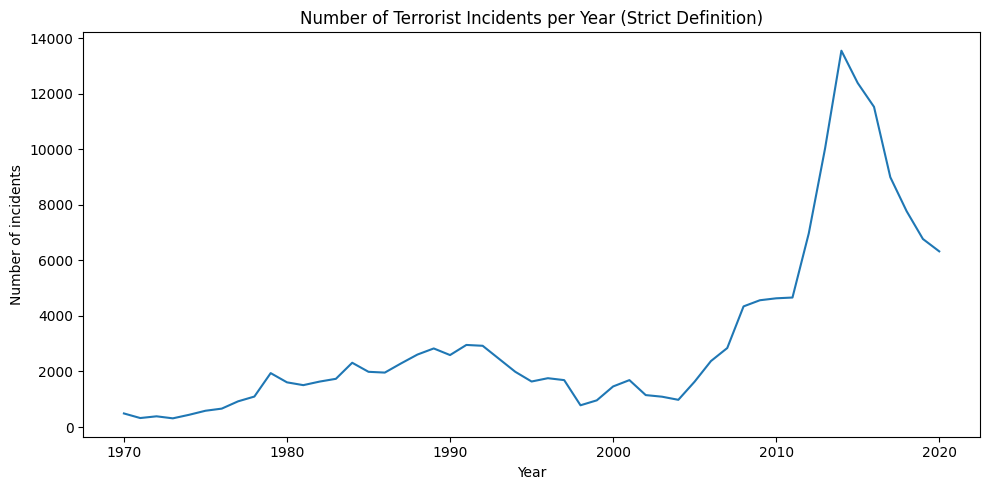

In [56]:
incidents_per_year = (
data_strict.groupby("iyear")
.size()
.reset_index(name="n_incidents")
)

plt.figure(figsize=(10,5))
sns.lineplot(data=incidents_per_year, x="iyear", y="n_incidents")
plt.title("Number of Terrorist Incidents per Year (Strict Definition)")
plt.xlabel("Year")
plt.ylabel("Number of incidents")
plt.tight_layout()
plt.show()



In [57]:
plt.style.use("seaborn-v0_8")


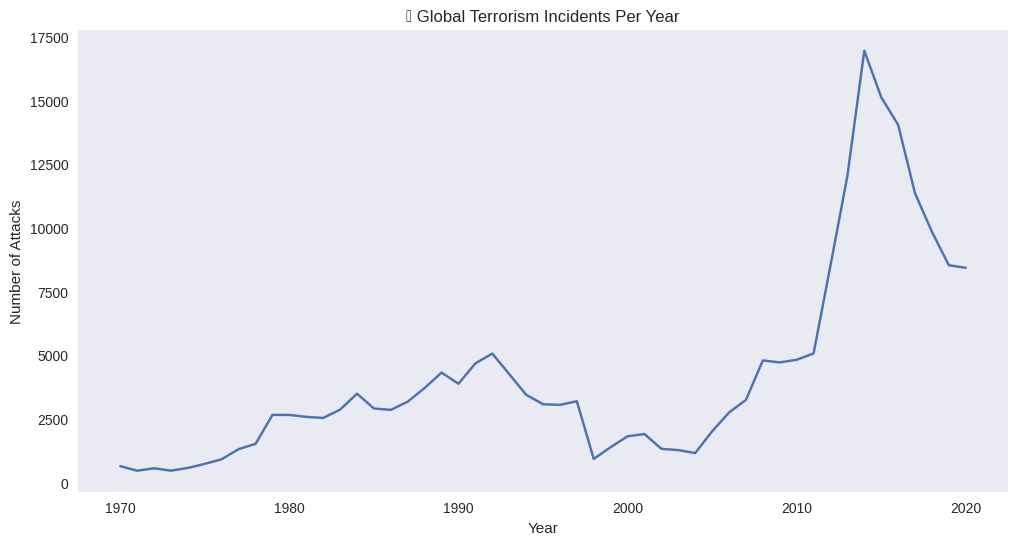

In [58]:
plt.figure(figsize=(12,6))
data.groupby('iyear').size().plot()
plt.title("Global Terrorism Incidents Per Year")
plt.xlabel("Year")
plt.ylabel("No of Attacks")
plt.grid()
plt.show()

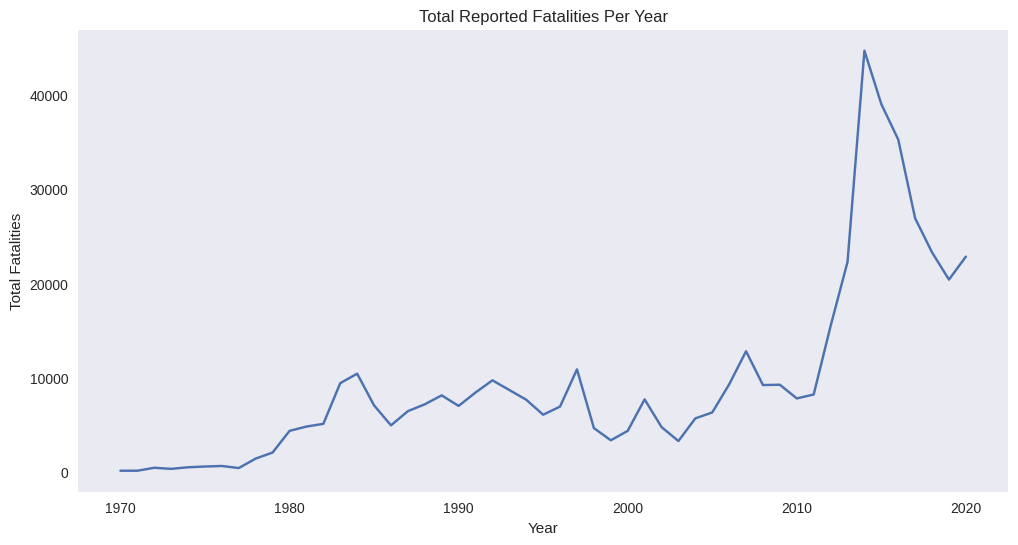

In [59]:
plt.figure(figsize=(12,6))
data.groupby('iyear')['nkill'].sum().plot()
plt.title("Total Reported Fatalities Per Year")
plt.xlabel("Year")
plt.ylabel("Total Fatalities")
plt.grid()
plt.show()

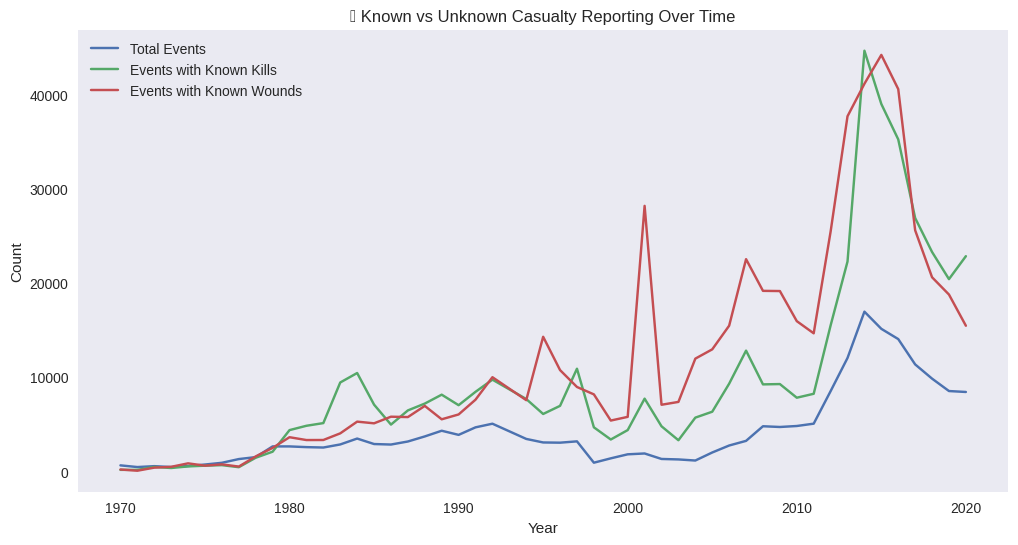

In [62]:
known_data = data.groupby('iyear')[['nkill','nwound']].sum()
total_events = data.groupby('iyear').size()

plt.figure(figsize=(12,6))
plt.plot(total_events.index, total_events.values, label="Total Events")
plt.plot(known_data.index, known_data['nkill'], label="Events with Known Kills")
plt.plot(known_data.index, known_data['nwound'], label="Events with Known Wounds")
plt.title("📊 Known vs Unknown Casualty Reporting Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid()
plt.show()


<Figure size 1400x700 with 0 Axes>

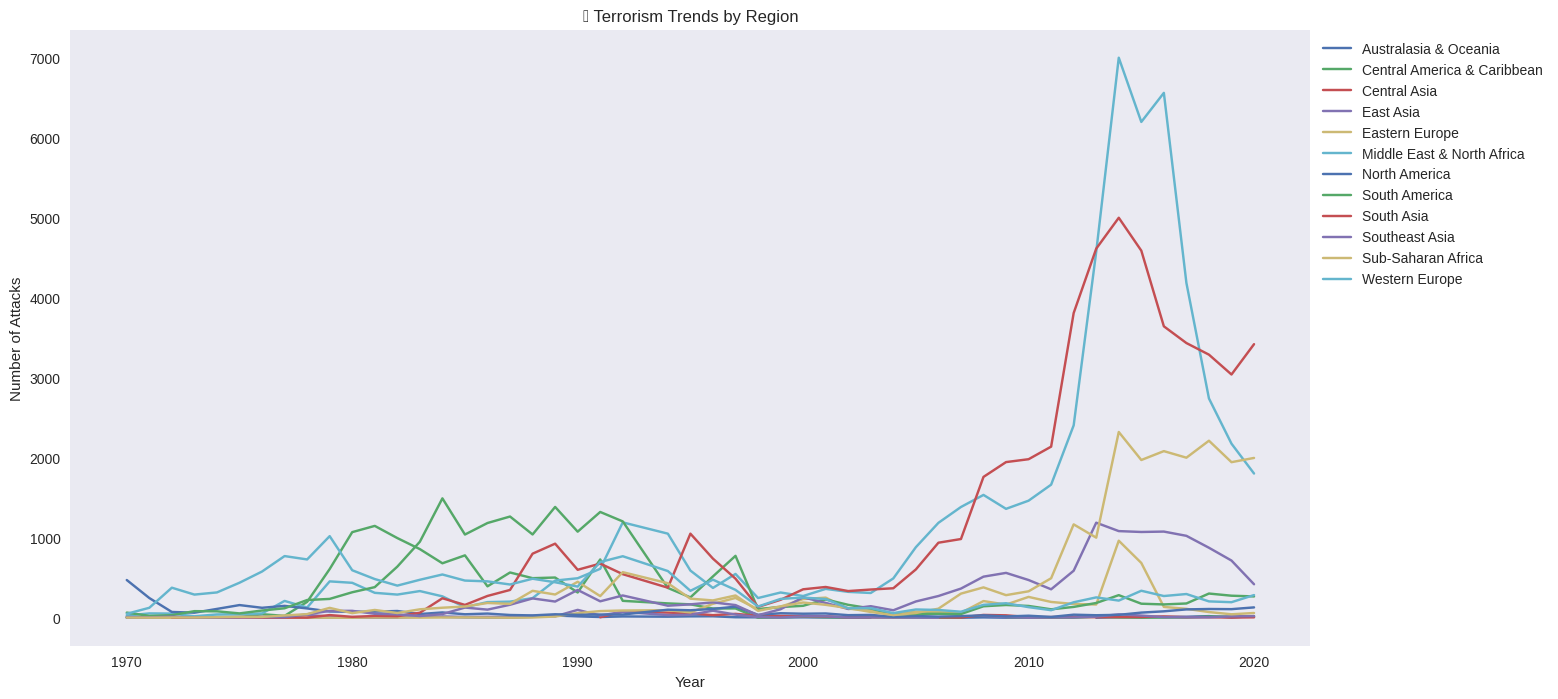

In [63]:
plt.figure(figsize=(14,7))
data.groupby(['iyear','region_txt']).size().unstack().plot(figsize=(16,8))
plt.title("🌍 Terrorism Trends by Region")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()


<Figure size 1400x700 with 0 Axes>

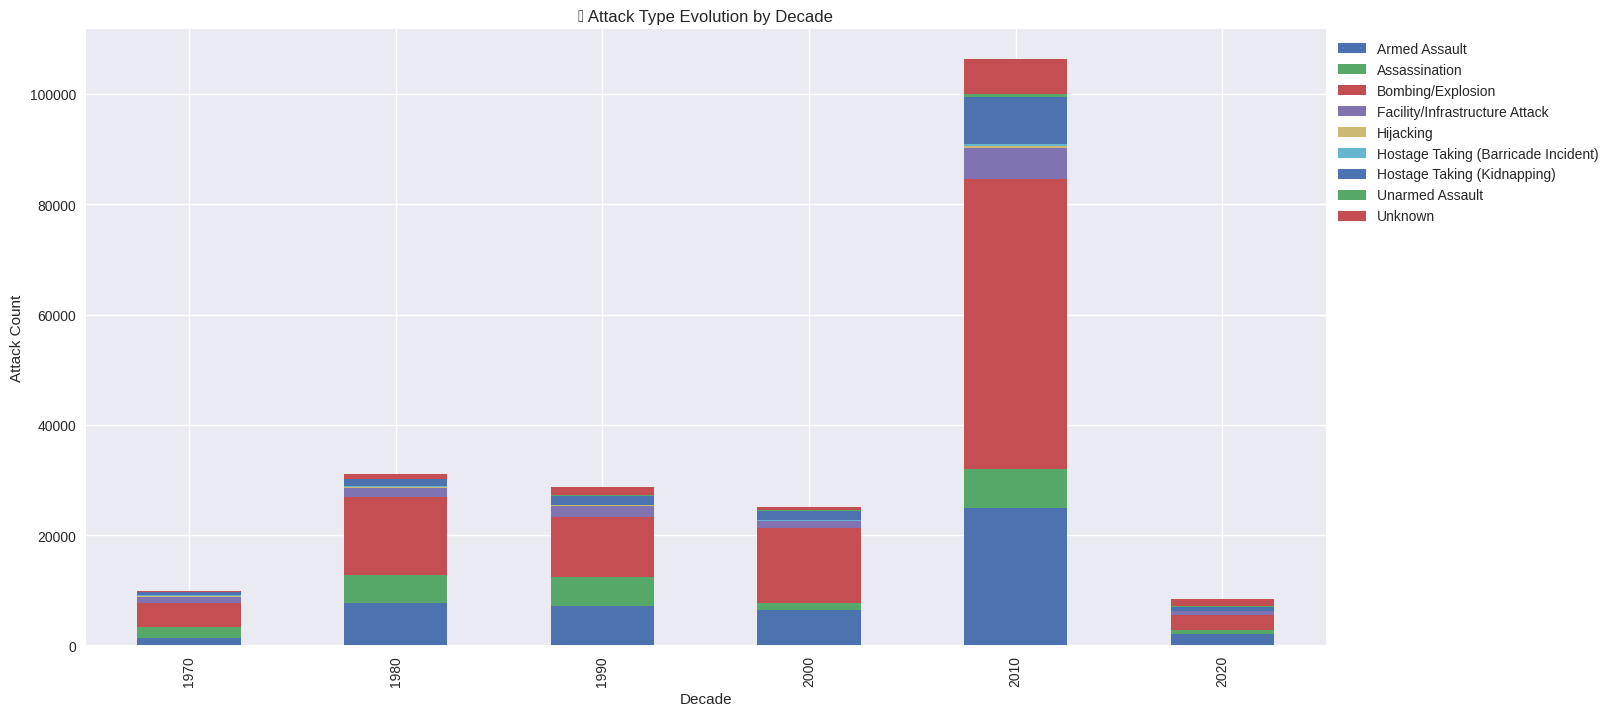

In [64]:
plt.figure(figsize=(14,7))
data.groupby(['decade','attacktype1_txt']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(16,8)
)
plt.title("🧨 Attack Type Evolution by Decade")
plt.xlabel("Decade")
plt.ylabel("Attack Count")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


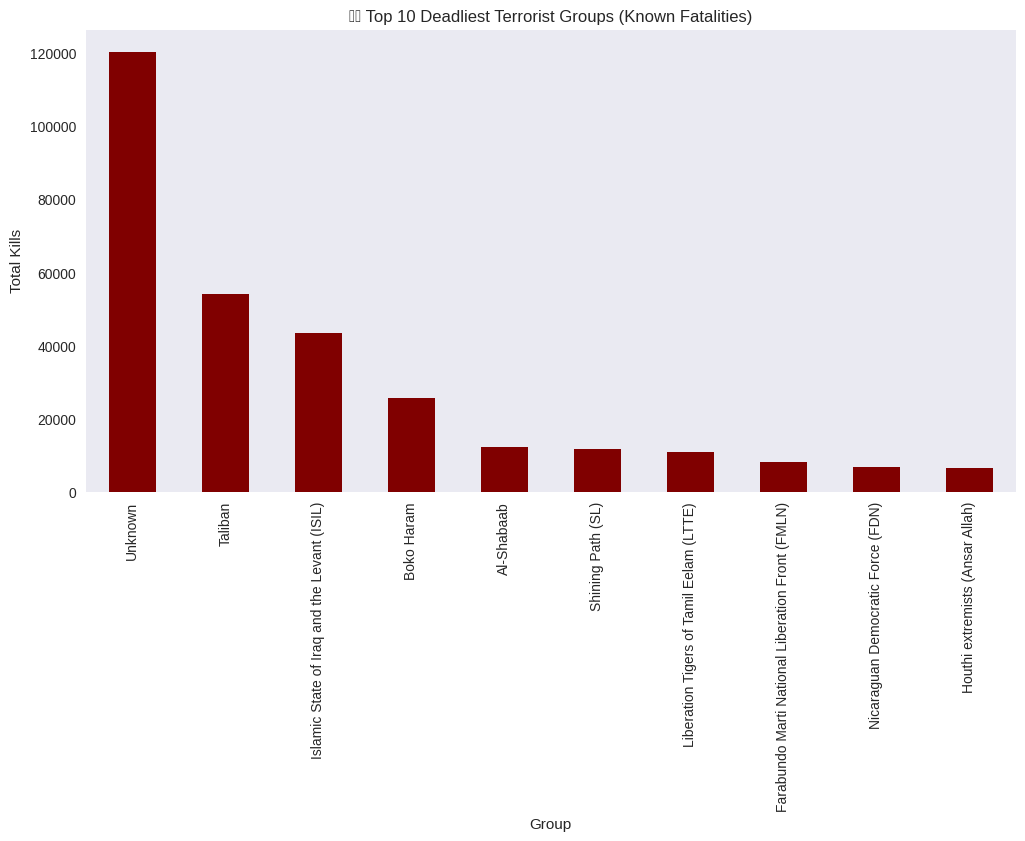

In [65]:
top_groups = data.groupby('gname')['nkill'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_groups.plot(kind='bar', color='maroon')
plt.title("☠️ Top 10 Deadliest Terrorist Groups (Known Fatalities)")
plt.xlabel("Group")
plt.ylabel("Total Kills")
plt.grid()
plt.show()

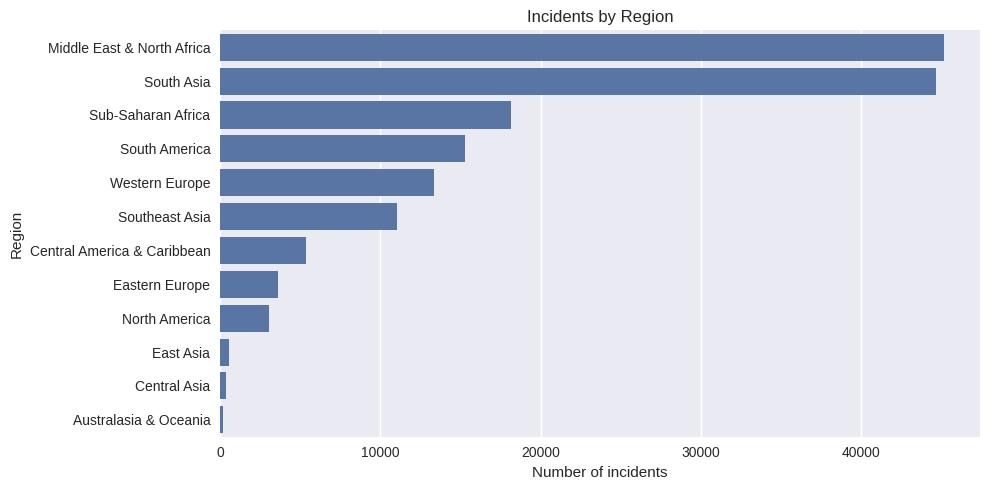

In [67]:
top_regions = (
data_strict["region_txt"]
.value_counts()
.reset_index(name="n_incidents")
.rename(columns={"index": "region_txt"})
)

plt.figure(figsize=(10,5))
sns.barplot(data=top_regions, y="region_txt", x="n_incidents")
plt.title("Incidents by Region")
plt.xlabel("Number of incidents")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

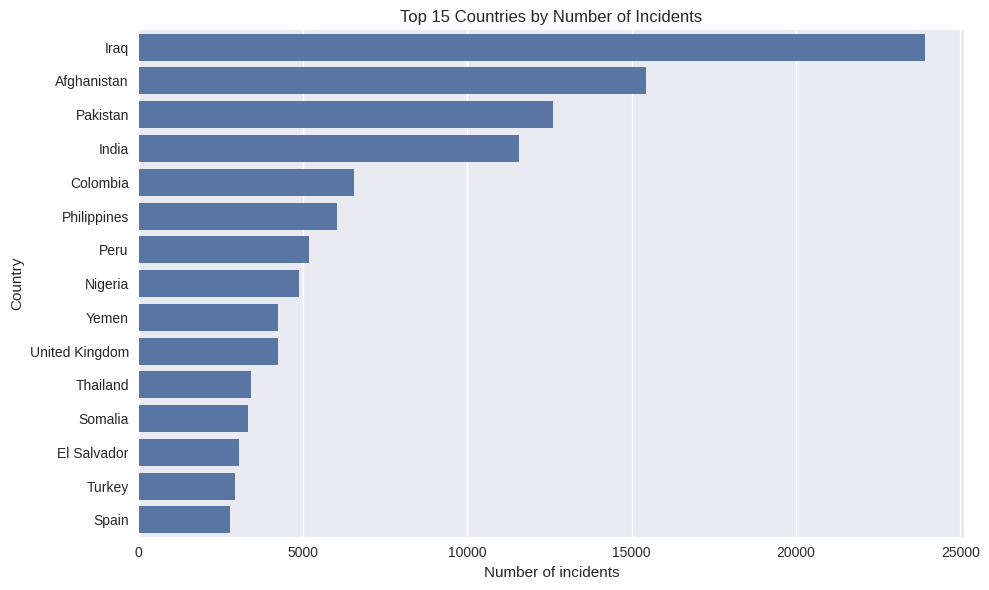

In [68]:
top_countries = (
data_strict["country_txt"]
.value_counts()
.head(15)
.reset_index(name="n_incidents")
.rename(columns={"index": "country_txt"})
)

plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, y="country_txt", x="n_incidents")
plt.title("Top 15 Countries by Number of Incidents")
plt.xlabel("Number of incidents")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

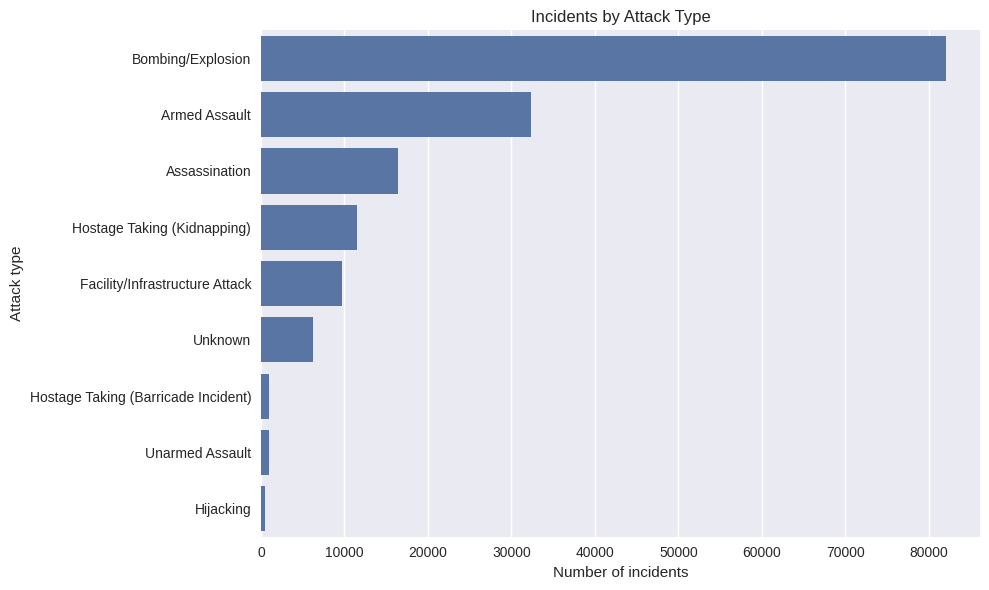

In [69]:
attack_severity = (
data_strict.groupby("attacktype1_txt")
.agg(
n_incidents=("attacktype1_txt", "size"),
avg_severity=("severity_score", "mean")
)
.reset_index()
)

plt.figure(figsize=(10,6))
attack_severity_sorted = attack_severity.sort_values("n_incidents", ascending=False)
sns.barplot(data=attack_severity_sorted,
y="attacktype1_txt", x="n_incidents")
plt.title("Incidents by Attack Type")
plt.xlabel("Number of incidents")
plt.ylabel("Attack type")
plt.tight_layout()
plt.show()



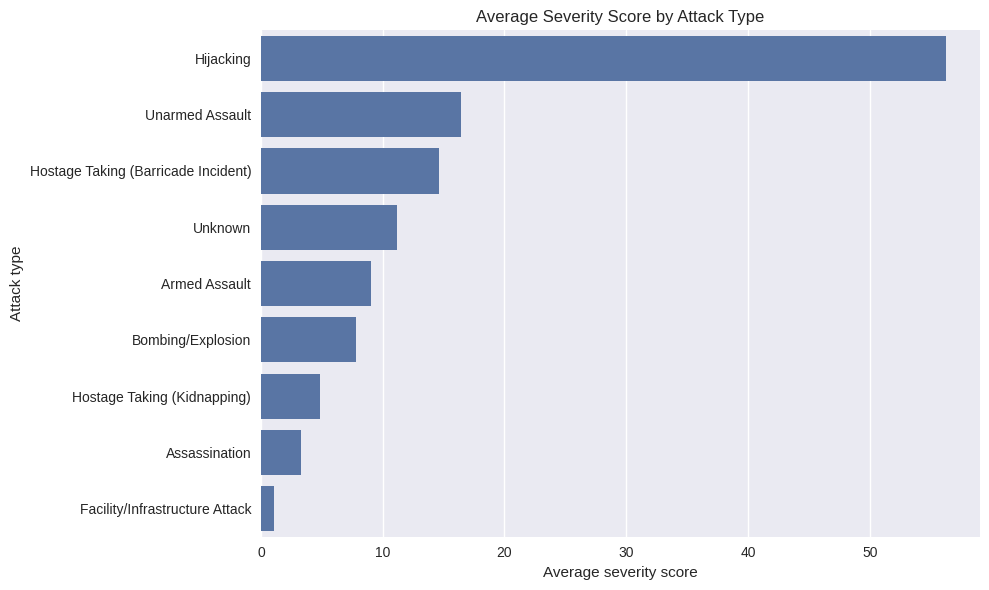

In [70]:
plt.figure(figsize=(10,6))
attack_severity_sorted = attack_severity.sort_values("avg_severity", ascending=False)
sns.barplot(data=attack_severity_sorted,
y="attacktype1_txt", x="avg_severity")
plt.title("Average Severity Score by Attack Type")
plt.xlabel("Average severity score")
plt.ylabel("Attack type")
plt.tight_layout()
plt.show()

In [71]:
group_stats = (
data_strict.groupby("gname")
.agg(
n_incidents=("gname", "size"),
success_rate=("success", "mean"),
avg_severity=("severity_score", "mean")
)
.reset_index()
)



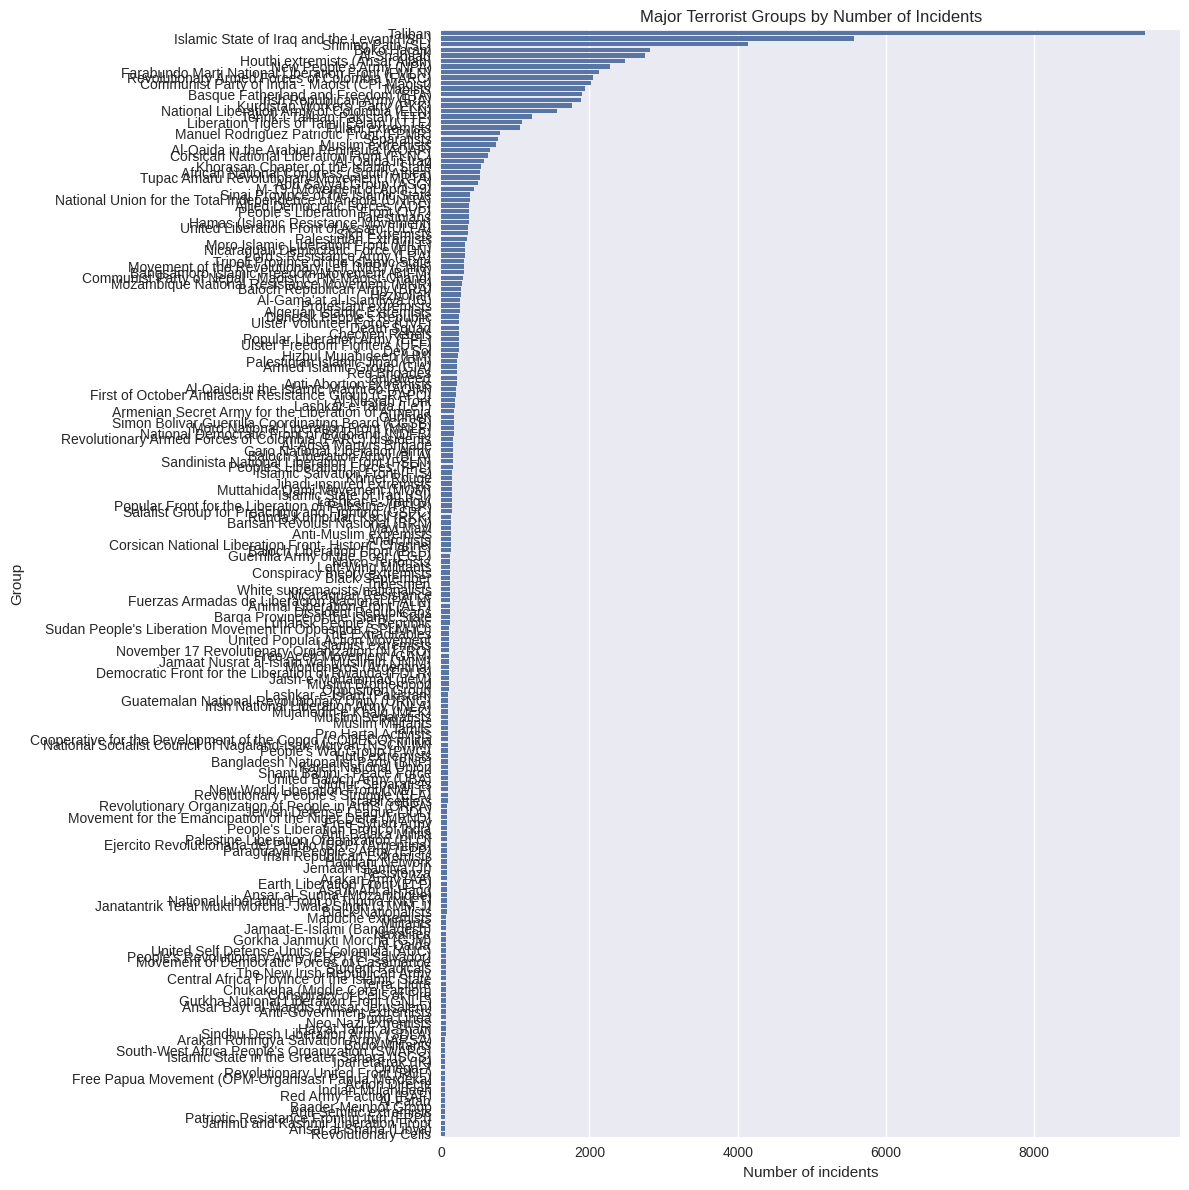

In [74]:
major_groups = group_stats[
(group_stats["gname"] != "Unknown") &
(group_stats["n_incidents"] >= 50)
].sort_values("n_incidents", ascending=False)

plt.figure(figsize=(12,12))
sns.barplot(data=major_groups, y="gname", x="n_incidents")
plt.title("Major Terrorist Groups by Number of Incidents")
plt.xlabel("Number of incidents")
plt.ylabel("Group")
plt.tight_layout()
plt.show()

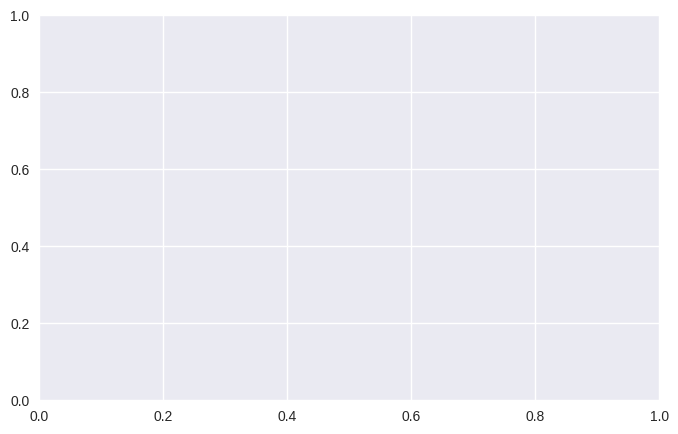

In [77]:
yr_reg = (
data_strict.groupby(["iyear", "region_txt"])
.size()
.reset_index(name="n_incidents")
)

years = sorted(yr_reg["iyear"].unique())
regions = sorted(yr_reg["region_txt"].unique())

fig, ax = plt.subplots(figsize=(8,5))

def update(year):
  ax.clear()
  data_year = yr_reg[yr_reg["iyear"] == year].copy()
  data_year = data_year.set_index("region_txt").reindex(regions).fillna(0).reset_index()



In [86]:
import plotly.express as px
agg = (
data_strict
.groupby(["iyear", "region_txt"])
.agg(
n_incidents=("iyear", "size"),
avg_severity=("severity_score", "mean"),
total_killed=("nkill", "sum"),
total_wounded=("nwound", "sum")
)
.reset_index()
)



In [87]:
agg = agg.sort_values("iyear")
agg["iyear_str"] = agg["iyear"].astype(str)



In [88]:
agg = agg[agg["iyear"] >= 1970]
fig = px.bar(
agg.sort_values("n_incidents"),
x="n_incidents",
y="region_txt",
color="avg_severity", # color encodes how severe incidents are
animation_frame="iyear", # frames = year
orientation="h",
range_x=[0, agg["n_incidents"].max() * 1.1],
color_continuous_scale="Reds",
labels={
"n_incidents": "Number of incidents",
"region_txt": "Region",
"avg_severity": "Average severity (2×killed + wounded)",
"iyear": "Year"
},
title="Global Terrorism: Incidents and Severity by Region Over Time"
)

In [89]:
fig.update_layout(
xaxis=dict(title="Number of incidents"),
yaxis=dict(title="Region", categoryorder="total ascending"),
coloraxis_colorbar=dict(title="Avg severity"),
updatemenus=[{
"type": "buttons",
"buttons": [
{
"label": "Play",
"method": "animate",
"args": [None, {"frame": {"duration": 500, "redraw": True},
"fromcurrent": True, "transition": {"duration": 300}}]
},
{
"label": "Pause",
"method": "animate",
"args": [[None], {"frame": {"duration": 0, "redraw": False},
"mode": "immediate"}]
}
],
"showactive": True
}]
)

In [90]:
fig.update_traces(
hovertemplate=("Year: %{frame}"
"Region: %{y}"
"Incidents: %{x}"
"Avg severity: %{marker.color:.2f}<extra></extra>"
)
)

